In [1]:
# Reading an excel file using Python 
import xlrd as xl
import numpy as np
import matplotlib.pyplot as plt
import LSRegressor as LS

In [2]:
def crossfold(train_data,train_labels,i): 
    if i == 1:
        validation_data = train_data[:1600]
        new_train_data = np.concatenate((train_data[1601:3200], train_data[3201:4800],train_data[4801:6400],train_data[6401:]))
        validation_labels = train_labels[:1600]
        new_train_labels = np.concatenate((train_labels[1601:3200], train_labels[3201:4800],train_labels[4801:6400],train_labels[6401:]))
    elif i == 2:
        validation_data = train_data[1601:3200]
        new_train_data = np.concatenate((train_data[:1600], train_data[3201:4800],train_data[4801:6400],train_data[6401:]))
        validation_labels = train_labels[1601:3200]
        new_train_labels = np.concatenate((train_labels[:1600], train_labels[3201:4800],train_labels[4801:6400],train_labels[6401:]))
    elif i == 3:
        validation_data = train_data[3201:4800]
        new_train_data = np.concatenate((train_data[1601:3200], train_data[:1600],train_data[4801:6400],train_data[6401:]))
        validation_labels = train_labels[3201:4800]
        new_train_labels = np.concatenate((train_labels[1601:3200], train_labels[:1600],train_labels[4801:6400],train_labels[6401:]))
    elif i == 4:
        validation_data = train_data[4801:6400]
        new_train_data = np.concatenate((train_data[1601:3200], train_data[3201:4800],train_data[:1600],train_data[6401:]))
        validation_labels = train_labels[4801:6400]
        new_train_labels = np.concatenate((train_labels[1601:3200], train_labels[3201:4800],train_labels[:1600],train_labels[6401:]))
    elif i == 5:
        validation_data = train_data[6401:]
        new_train_data = np.concatenate((train_data[1601:3200], train_data[3201:4800],train_data[4801:6400],train_data[:1600]))
        validation_labels = train_labels[6401:]
        new_train_labels = np.concatenate((train_labels[1601:3200], train_labels[3201:4800],train_labels[4801:6400],train_labels[:1600]))
       
    return validation_data,validation_labels, new_train_data,new_train_labels

In [3]:
#Loading the data from the excel file
# Give the location of the file 
loc = ('Folds5x2_pp.xlsx') 
  
# To open Workbook 
wb = xl.open_workbook(loc) 
sheet = wb.sheet_by_index(0) 
all_data = np.ndarray(shape=(sheet.nrows-1,sheet.ncols), dtype = float)

for i in range(1, sheet.nrows):
    for j in range(sheet.ncols):
        all_data[i-1][j] = sheet.cell_value(i,j)
        

test_data = all_data[8001:]
train_data = all_data[:8000]

V = train_data[:,1]
PE = train_data[:,4]



In [4]:
def Erms(Ypred,target):
    E = np.sqrt(((Ypred-target)**2).mean())
    return E

In [5]:
def prepareX(X,degree):
    newX = X
    for i in range(2,degree+1):
        X = np.column_stack([X,np.power(newX,i)])
        #print X.shape
    return X

In [6]:
#Finding the best order of polynomial
LSR = LS.LSRegressor()
V = np.array([],dtype = float)
num_test = 3333
TotalError_train = np.array([],dtype =float)
AvgError_train =np.array([],dtype = float)
TotalError = np.array([],dtype =float)
AvgError =np.array([],dtype = float)
degree = [1,2,3,4,5,6,7,8,9,10,11,12,13]

for d in degree:
    for i in range (1, 6):
        V = train_data[:,1]
    
        V = prepareX(V, d)
        size = V.shape[0]
        ones = np.ones((size,))
        V = np.vstack((V.T, ones)).T
        PE = train_data[:,4]
        val_data, val_labels, new_train_data,new_train_labels = crossfold(V,PE,i)
        LSR.train(new_train_data,new_train_labels)
        # Predict the labels of validation data
        y_test_pred = LSR.predict(val_data)
        # Predict the labels of training data
        y_test_pred_train = LSR.predict(new_train_data)
        # Compute the Erms of training and validation Erms of each fold
        Error =  Erms(y_test_pred,val_labels)
        Error_train =  Erms(y_test_pred_train,new_train_labels)
        TotalError = np.append(TotalError,Error)
        TotalError_train = np.append(TotalError_train,Error_train)
    AvgError = np.append(AvgError, np.mean(TotalError)) # Computes the average Erms using validation set
    AvgError_train = np.append(AvgError_train, np.mean(TotalError_train)) # Computes the average Erms using training set

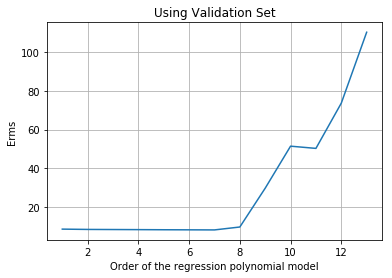

In [7]:
plt.plot(degree,AvgError)
plt.title('Using Validation Set')
plt.xlabel('Order of the regression polynomial model')
plt.ylabel('Erms')
plt.grid(True)
plt.show()

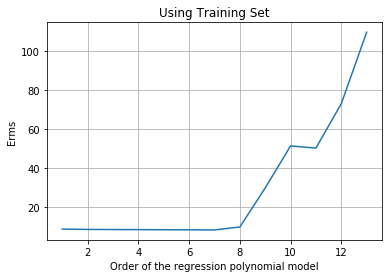

In [8]:
plt.plot(degree,AvgError_train)
plt.title('Using Training Set')
plt.xlabel('Order of the regression polynomial model')
plt.ylabel('Erms')
plt.grid(True)
plt.show()

In [9]:
#Testing using best order polynomial = 8
LSR = LS.LSRegressor()
V = np.array([],dtype = float)
num_test = 3333
TotalError_train = np.array([],dtype =float)
AvgError_train =np.array([],dtype = float)
TotalError = np.array([],dtype =float)
AvgError =np.array([],dtype = float)

#Taking V from testing and training data 
V_test = test_data[:,1]
V_train = train_data[:,1] 
#Adding the column of ones to both training and testing
V_test = prepareX(V_test, 8)
size = V_test.shape[0]
ones = np.ones((size,))
V_test = np.vstack((V_test.T, ones)).T

V_train = prepareX(V_train, 8)
size = V_train.shape[0]
ones = np.ones((size,))
V_train = np.vstack((V_train.T, ones)).T

#Taking PE from testing and training data 
PE_train = train_data[:,4]
PE_test = test_data[:,4]

#Training
LSR.train(V_train,PE_train)
# Predict the labels of testing data
y_test_pred = LSR.predict(V_test)

# Compute the Erms of testing data
Error =  Erms(y_test_pred,PE_test)

print 'Erms using testing data: ', Error

Erms using testing data:  8.243256759768153


In [10]:
#Part 3: Finding the Best Subset
subset_error = np.array([],dtype =float)
subset_error_train =np.array([],dtype = float)
combinations = [[0],[1],[2],[3],[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],[0,1,2],[0,1,3],[0,2,3],[1,2,3],[0,1,2,3]]
features_names =['AT','V','AP','RH','AT V','AT AP','AT RH','V AP',
                 'V RH','AP RH','AT V AP','AT V RH','AT AP RH',
                           'V AP RH','AT V AP RH']

for s in combinations:
    TotalError_s= np.array([],dtype =float)
    TotalError_train_s = np.array([],dtype =float)
    for i in range (1, 6):
        train_x = train_data[:,s]
            
        size = train_x.shape[0]
        ones = np.ones((size,))
        train_x = np.vstack((train_x.T, ones)).T
            
        train_y = train_data[:,4]
        #5 Cross-fold 
        val_data_s, val_labels_s, new_train_data_s,new_train_labels_s = crossfold(train_x,train_y,i)
            
        LSR = LS.LSRegressor()
            
        LSR.train(new_train_data_s,new_train_labels_s)
            
        y_test_pred = LSR.predict(val_data_s)
            
        y_test_pred_train = LSR.predict(new_train_data_s)
            
        Error_s =  Erms(y_test_pred,val_labels_s)
        #print subset , Error_s
            
        Error_train_s =  Erms(y_test_pred_train,new_train_labels_s)
        #print subset, Error_train_s
            
        TotalError_s = np.append(TotalError_s,Error_s)
        #  print TotalError_s
        TotalError_train_s = np.append(TotalError_train_s,Error_train_s)
           # print TotalError_train_s
    AvgError_s =  np.mean(np.mean(TotalError_s))
    print 'subset ', s,  AvgError_s
    subset_error = np.append(subset_error, AvgError_s)
    AvgError_train_s = np.mean(TotalError_train_s)
    print 'subset ',s,AvgError_train_s
    subset_error_train = np.append(subset_error_train,AvgError_train_s )
least_error_index = np.argmin(subset_error)
least_error_index_train = np.argmin(subset_error_train)
best_comb = combinations[least_error_index]
best_comb_train = combinations[least_error_index]

# printing the best combinations of feartures
print best_comb, best_comb_train
print subset_error

subset  [0] 5.435077826537684
subset  [0] 5.435296723108774
subset  [1] 8.478683011309908
subset  [1] 8.47637047291516
subset  [2] 14.590901100909354
subset  [2] 14.585561917799305
subset  [3] 15.808439164528128
subset  [3] 15.804075898450744
subset  [0, 1] 4.971568127422366
subset  [0, 1] 4.9713365741851225
subset  [0, 2] 5.382029955842207
subset  [0, 2] 5.381996368503354
subset  [0, 3] 4.784919964409276
subset  [0, 3] 4.785627964432067
subset  [1, 2] 7.906887477632479
subset  [1, 2] 7.903232014474334
subset  [1, 3] 8.215035450505571
subset  [1, 3] 8.211932903918958
subset  [2, 3] 13.441625083297163
subset  [2, 3] 13.435165037375105
subset  [0, 1, 2] 4.900646682806955
subset  [0, 1, 2] 4.899754459198052
subset  [0, 1, 3] 4.564634379924061
subset  [0, 1, 3] 4.564518467749581
subset  [0, 2, 3] 4.782959116423674
subset  [0, 2, 3] 4.7834505563510605
subset  [1, 2, 3] 7.596656308147779
subset  [1, 2, 3] 7.592278722330869
subset  [0, 1, 2, 3] 4.553483841348248
subset  [0, 1, 2, 3] 4.5528073

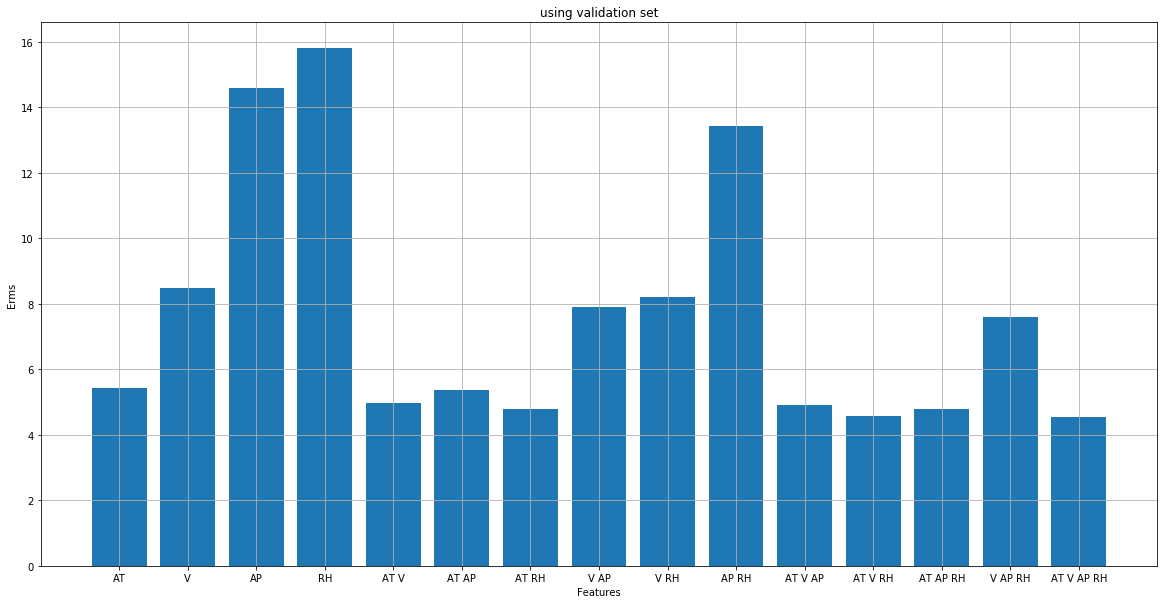

In [11]:
plt.figure(figsize=(20, 10))
plt.bar(features_names,subset_error)
plt.xlabel('Features')
plt.ylabel('Erms')
plt.title('using validation set')
plt.grid(True)
plt.show()

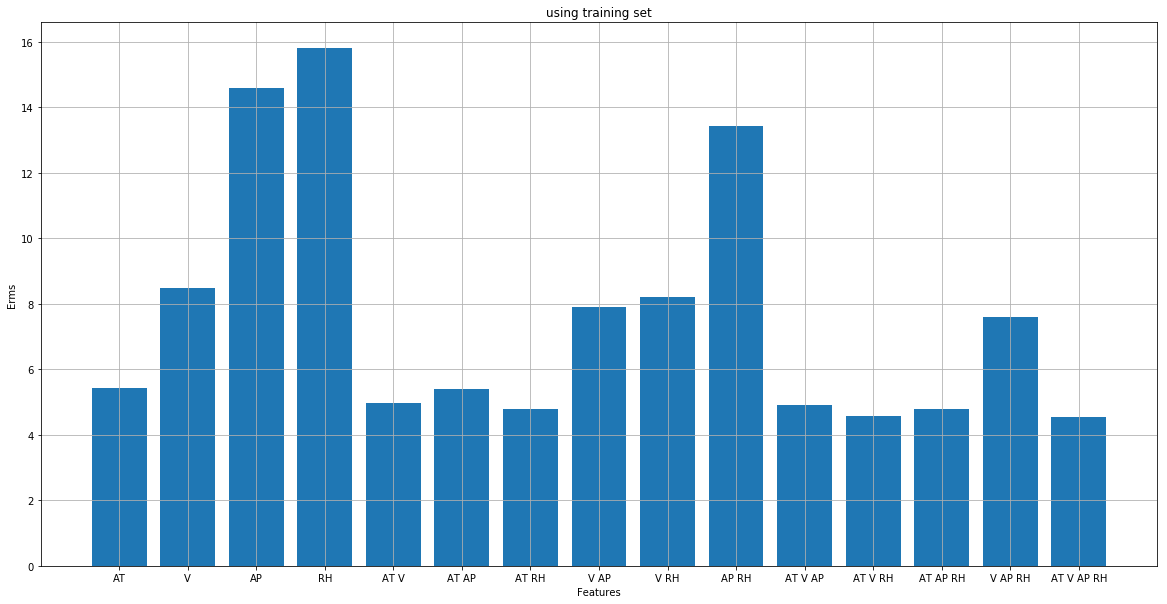

In [12]:
plt.figure(figsize=(20, 10))
plt.bar(features_names,subset_error_train)
plt.xlabel('Features')
plt.ylabel('Erms')
plt.title('using training set')
plt.grid(True)
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures
newdata= train_data[:,[0,1,2,3]]
newlabels = train_data[:,[4]]
TotalError_train_m = np.array([],dtype =float)
AvgError_train_m =np.array([],dtype = float)
TotalError_m = np.array([],dtype =float)
AvgError_m =np.array([],dtype = float)

LSR = LS.LSRegressor()
degree = [1,2,3,4,5]

for d in degree:
    for i in range(1,6):
        poly = PolynomialFeatures(d)
        
        val_data_m, val_labels_m, new_train_data_m,new_train_labels_m = crossfold(newdata,newlabels,i)
        
        x = poly.fit_transform(new_train_data_m)
        
        LSR.train(x,new_train_labels_m)
        
        y = poly.fit_transform(val_data_m)
        
        y_test_pred = LSR.predict(y)
        y_test_pred_train = LSR.predict(x)
        

        # Compute and print the fraction of correctly predicted examples
        Error =  Erms(y_test_pred,val_labels_m)
        #print d, Error
        Error_train =  Erms(y_test_pred_train,new_train_labels_m)
        TotalError_m = np.append(TotalError_m,Error)
        TotalError_train_m = np.append(TotalError_train_m,Error_train)
    AvgError_m = np.append(AvgError_m, np.mean(TotalError_m)) # Computes the average Erms using validation set
    AvgError_train_m = np.append(AvgError_train_m, np.mean(TotalError_train_m)) # Computes the average Erms using training set
print AvgError_m
print AvgError_train_m

[  23.74557187   23.77352759   24.56498031 2864.17799876 3543.60147184]
[  23.75785554   23.78544138   24.5822752  2960.81235524 3609.14135349]


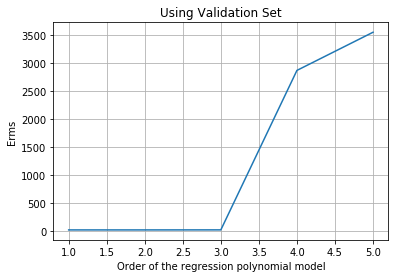

In [14]:
plt.plot(degree,AvgError_m)
plt.title('Using Validation Set')
plt.xlabel('Order of the regression polynomial model')
plt.ylabel('Erms')
plt.grid(True)
plt.show()

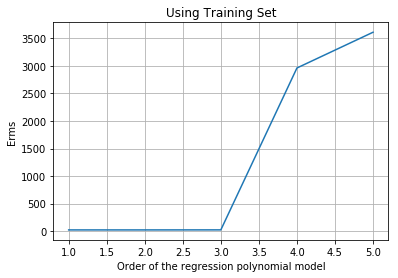

In [15]:
plt.plot(degree,AvgError_train_m)
plt.title('Using Training Set')
plt.xlabel('Order of the regression polynomial model')
plt.ylabel('Erms')
plt.grid(True)
plt.show()